# Explanotary Data Analysis 
## Разведочный анализ данных


1. Обзор набора данных
2. Географическое разбиение данных
3. Обработка отсутствующих данных
4. Характеристики отдельных столбцов
5. План дальнейших действий:


## Подключаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Описание дата сета

### Загружаем датафрейм

In [2]:
apart_rent = pd.read_csv('/home/viktorya/Рабочий стол/#проект1/_data.csv', index_col=[0])

**Дата сет представлен в виде таблице** , включающий в себя **23368** квартир и **24** колонок содержащих характеристики на каждую из квартир. Большинство столбцов необходимо будет в дальнейшем разделять на несколько для удобства обработки данных, так как на данный момент в них **разные тип данных (int и str)**. Есть столбцы со значением Nan. Также есть данные, которые индивидуальны для каждой строки - ID объявления и Ссылка на объявление. **Доступны следующие колонки:**

In [3]:
apart_rent.columns


Index(['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание',
       'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

## Географическое разбиение данных

Так как в качестве пилотного региона выбрана **Москва**, проверим Адрес на наличие других регионов в датафрейме

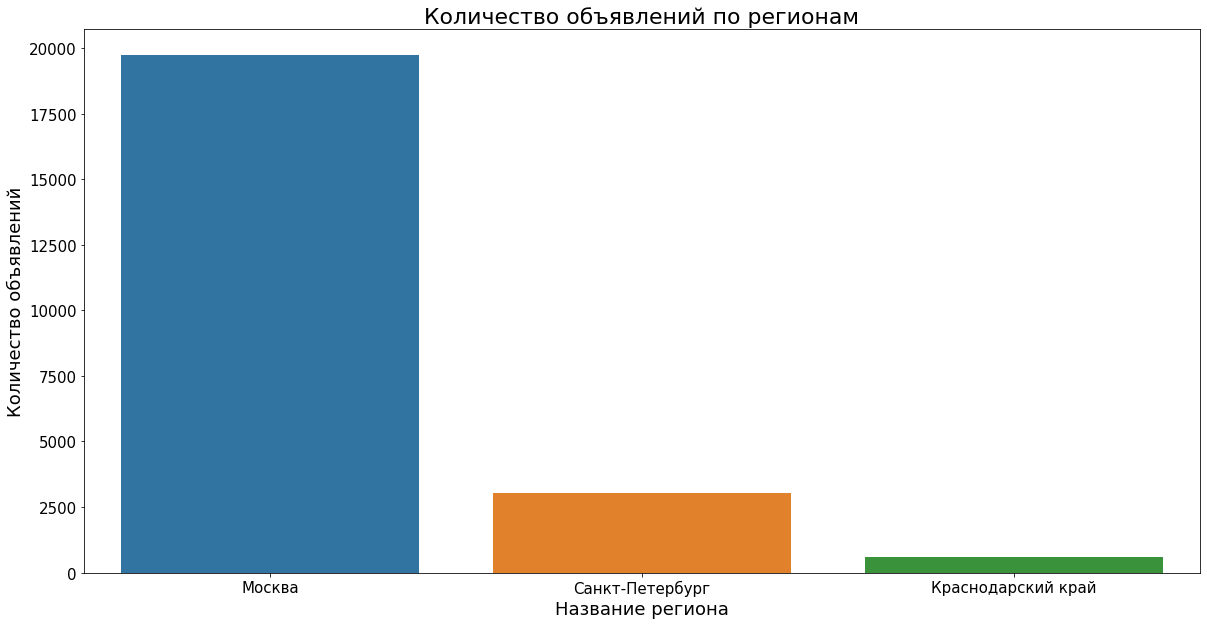

In [4]:
import seaborn as sns
city = pd.DataFrame(apart_rent['Адрес'].apply(lambda x: x.split(', ')[0]).value_counts()).reset_index()
plt.style.use('default')

plt.figure(figsize=(20, 10))
sns.barplot(x='Адрес', y='count', data=city)

plt.title('Количество объявлений по регионам', size=22)
plt.xlabel('Название региона', size=18)
plt.ylabel('Количество объявлений', size=18)
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()


### Убираем объявления с Санкт-Петербургом и Краснодарским краем

In [5]:
apart_rent.drop(apart_rent.loc[apart_rent['Адрес'].apply(lambda x: x.split(', ')[0] != 'Москва')].index, inplace=True)
apart_rent.shape

(19737, 24)

### Для того, чтобы просмотреть информацию о размерности данных воспользуемся функцией info()

In [6]:
apart_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19737 entries, 0 to 23367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID  объявления            19737 non-null  int64  
 1   Количество комнат         19202 non-null  object 
 2   Тип                       19737 non-null  object 
 3   Метро                     19391 non-null  object 
 4   Адрес                     19737 non-null  object 
 5   Площадь, м2               19737 non-null  object 
 6   Дом                       19737 non-null  object 
 7   Парковка                  8563 non-null   object 
 8   Цена                      19737 non-null  object 
 9   Телефоны                  19737 non-null  object 
 10  Описание                  19737 non-null  object 
 11  Ремонт                    17274 non-null  object 
 12  Площадь комнат, м2        12509 non-null  object 
 13  Балкон                    13107 non-null  object 
 14  Окна       

У нас имеется только **два столбца с числовыми данными**, но можно предположить, что должно быть больше таких столбцов. Возможно, потребуется **изменить** тип данных или **извлечь** дополнительную информацию из этих столбцов в дальнейшем. Кроме того, следует обратить внимание на то, что некоторые столбцы содержат большое количество значений NaN (например, Серия дома и Название ЖК), что указывает на отсутствие информации в этих ячейках.

 ### Обработка отсутствующих данных


In [7]:
import pandas as pd
import seaborn as sns
from IPython.display import display

def print_useful_rows_info(df):
    # Настройка стиля Seaborn
    sns.set(style="whitegrid")

    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
    print('\n')

    missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)

    # Оформление вывода процента пропущенных значений
    print('Процент пропущенных значений:')
    formatted_missing_values = missing_values.apply(lambda x: '{:.2f}%'.format(x))
    formatted_missing_values = formatted_missing_values.to_frame().style.bar(color='lightblue')

    # Вывод стилизованной таблицы
    display(formatted_missing_values)

print_useful_rows_info(apart_rent)

Количество полностью заполненных объектов из всей выборки: 6
Процент полностью заполненных объектов из всей выборки: 0.03


Процент пропущенных значений:


,0
Серия дома,89.41%
Название ЖК,77.42%
Парковка,56.61%
"Высота потолков, м",46.62%
Мусоропровод,40.57%
"Площадь комнат, м2",36.62%
Балкон,33.59%
Окна,26.09%
Можно с детьми/животными,24.90%
Лифт,21.24%


Из всего набора объявлений у нас заполнены все колонки только **в 3% от общего числа**. Также видно, что более 50% данных отсутствуют в трех конкретных колонках. Исходя из этого, эти колонки могут быть **кандидатами на удаление** в дальнейшем исследовании данных, которое поможет принять более обоснованное решение.

### Посмотрим количество уникальных значений по колонкам

In [8]:
def calculate_unique_values(df):
    unique_values = {}
    for elem in df:
        unique_values[elem] = len(df[elem].unique())
    return unique_values
    
d = pd.DataFrame(list(calculate_unique_values(apart_rent).items()), columns = ['factor', 'count'])


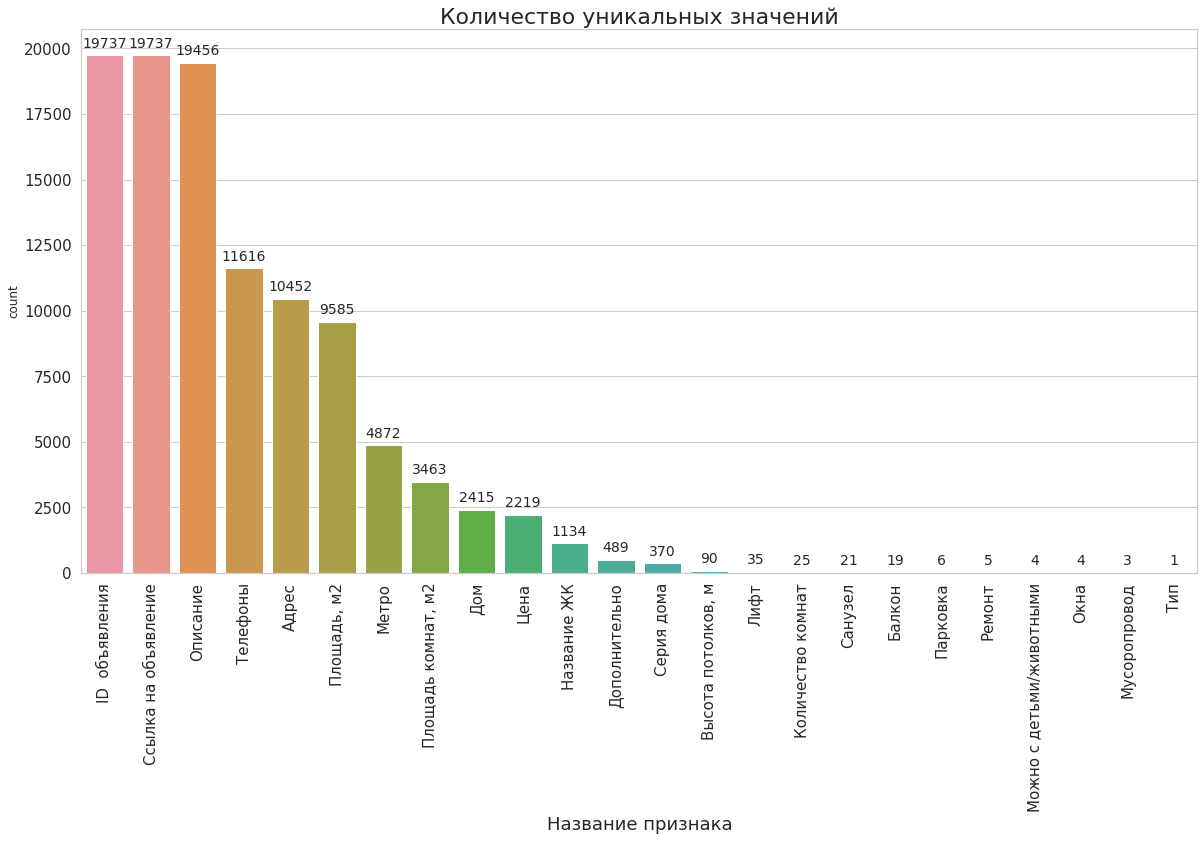

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x=d['factor'], y=d['count'], ax=ax, order=d.sort_values('count', ascending=False)['factor'])

plt.title('Количество уникальных значений', size=22)
plt.xlabel('Название признака', size=18)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)

for bar in ax.containers[0]:
    ax.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', size=14)

plt.show()


### Выводы
1. Колонка "Тип" имеет только одно значение, поэтому ее можно удалить, так как она не несет информационной ценности.
2. Колонки "Мусоропровод", "Окна", "Ремонт", "Парковка", "Можно с детьми/животными" содержат небольшое количество значений. Это может указывать на то, что эти колонки могут быть категориальными признаками, которые могут быть использованы для классификации или анализа данных.
3. Колонки "Ссылка на объявление", "Описание" и "ID объявления" имеют большое количество уникальных значений. Вероятно, эти колонки несут слишком много разнородной информации и могут быть удалены в дальнейшем анализе.

## Посмотрим метрики для каждого столбца

In [11]:
description = apart_rent.describe()

# Применение стиля background gradient к описанию
styled_description = description.style.background_gradient()
styled_description 

,ID объявления,"Высота потолков, м"
count,19737.000000,10535.000000
mean,267114888.218270,2.992925
std,19801055.081395,7.852740
min,107298592.000000,1.200000
25%,271221229.000000,2.640000
50%,273928403.000000,2.640000
75%,274697333.000000,2.800000
max,275006443.000000,320.000000


Так как для всех объектов ID объявление уникально, то мы им принебрегаем.
Высота потолков от 1,2 до 320 метров - тут имеем дело с выбросами

## Характеристики отдельных столбцов


Можем удалить стобец 'Телефоны', поскольку номер телефона не влияет на стоимость

In [12]:
value_counts = apart_rent['Тип'].value_counts().to_frame()

# Стилизация таблицы
styled_value_counts = value_counts.style
styled_value_counts = value_counts.style.set_properties(max_colwidth=10)

# Вывод стилизованной таблицы
print(styled_value_counts)


styled_value_counts = value_counts.style.set_properties(**{'text-align': 'center'})
styled_value_counts

,count
Тип,
Квартира,19737


Столбец 'Тип' содержит только одно значение "Квартира" для всех строк в DataFrame apart_rent он не несет  полезной информации для анализа или моделирования.Удаление столбца не повлияет на результаты и выводы.

In [13]:
a = 'Пропуски в стобце: "Площадь комнат, м2"' 
colum = apart_rent['Площадь комнат, м2'].isnull().sum()
print(a, colum)

Пропуски в стобце: "Площадь комнат, м2" 7228


In [8]:
nan_s= (apart_rent['Площадь комнат, м2'].isnull().sum() / len(apart_rent)) * 100 
print('% пропусков в стобце "Площадь комнат, м2":',  nan_s)


% пропусков в стобце "Площадь комнат, м2": 36.621573694077114


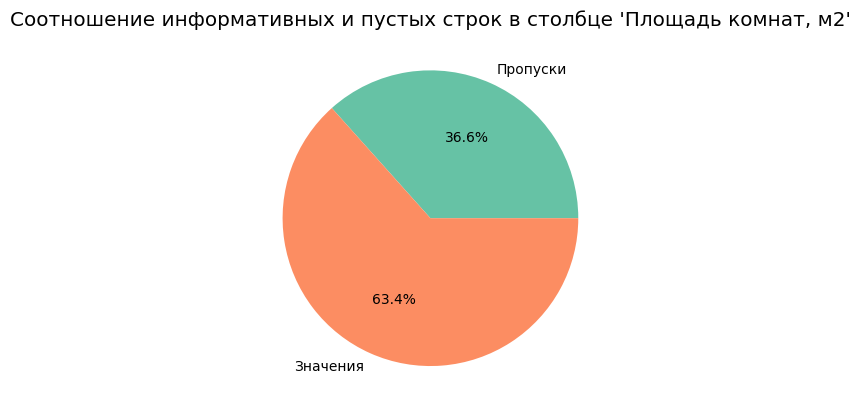

In [9]:
vals = [nan_s, 100-nan_s]
labels = ['Пропуски', 'Значения']

plt.style.use('ggplot')

colors = plt.cm.Set2(range(len(vals)))  # Используем палитру Set1

plt.pie(vals, labels=labels, autopct='%1.1f%%', colors=colors)  # Используем параметр colors

plt.title("Соотношение информативных и пустых строк в столбце 'Площадь комнат, м2'")

plt.show()


Из круговой диаграммы  видно, что количество пропусков практически 50%, при этом имеется альтернативный стобец с общей площадью, где количество пропусков 0, следовательно данный можно удалить



In [17]:
(apart_rent['Серия дома'].isnull().sum() / len(apart_rent)) * 100 


89.40568475452196

Можно удалить стоблец ['Серия дома'] поскольку он не влияет на стоимость жилья, является идентификационным номером
так же можно увидеть, что 90% информации пропуски 

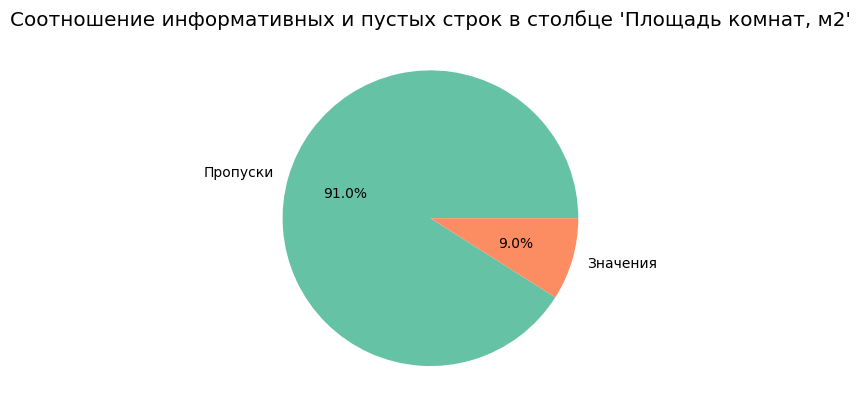

In [10]:
vals = [91,9]
labels = ['Пропуски', 'Значения']

plt.style.use('ggplot')

colors = plt.cm.Set2(range(len(vals)))  # Используем палитру Set1

plt.pie(vals, labels=labels, autopct='%1.1f%%', colors=colors)  # Используем параметр colors

plt.title("Соотношение информативных и пустых строк в столбце 'Площадь комнат, м2'")

plt.show()


In [19]:
apart_rent.drop('Серия дома', axis= 1 , inplace= True ) 

In [20]:
#по выше перечисленным причинам удаляем также стобец Название ЖК
nan_2=[apart_rent['Название ЖК'].isnull().sum() / len(apart_rent) * 100]
print(nan_2)

[77.42311394842176]


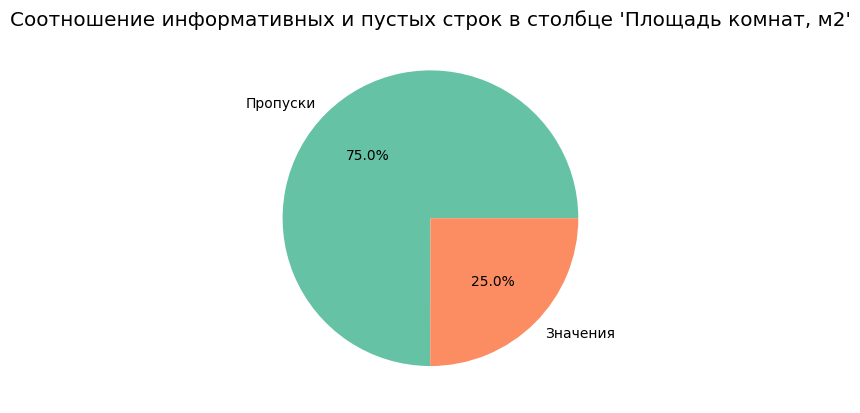

Удаляем данный столбец из-за большого количесва пропусков и отсустсвием влияния на стоимость


In [5]:
nan_2 = apart_rent['Название ЖК'].isnull().sum() / len(apart_rent) * 100
vals = [nan_2, 100 - nan_2]
plt.style.use('ggplot')

labels = ['Пропуски', 'Значения']
colors = plt.cm.Set2(range(len(vals)))  # Используем палитру Set1

plt.pie(vals, labels=labels, autopct='%1.1f%%', colors=colors)  # Используем параметр colors

plt.title("Соотношение информативных и пустых строк в столбце 'Площадь комнат, м2'")

plt.show()
print('Удаляем данный столбец из-за большого количесва пропусков и отсустсвием влияния на стоимость')

# План дальнейшей работы может быть следующим:

1. Заменить названия колонок на английском языке и обработать пропущенные значения (NaN) и значения None. Это поможет создать более удобную и однородную структуру данных.
2. Добавить новые признаки (фичи) на основе имеющихся данных. Например, можно разбить существующие колонки на несколько более детальных, преобразовать текстовые данные в числовые или создать дополнительные признаки, основываясь на имеющихся данных.
3. Удалить дубликаты объявлений, чтобы избежать повторений и сохранить только уникальные данные. Это поможет очистить данные и предотвратить искажения при анализе или обучении модели.
4. Передать файл "data.csv" команде машинного обучения для обучения модели. Подготовленные данные могут быть использованы для тренировки и оценки различных моделей машинного обучения.


План дальнейшей работы охватывает шаги по обработке данных, созданию новых признаков, очистке и подготовке данных для дальнейшего анализа или обучения моделей машинного обучения.